In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

## COMP 3122 - Artificial Intelligence with Python
__Week 13 lecture__

### [github.com/kamrik/ML1](https://github.com/kamrik/ML1)

### [slido.com/COMP3122](http://slido.com/COMP3122)

## The plan for today
 - Exam prep advice
 - Regularization
 - By popular demand:
   - Productionizing ML
   - Interviewing

## Final exam prep advice
 * Same format as the mid-term
 * The exam will include material from the entire semester - do not neglect NumPy and Pandas basics
 * Focus on lab exercises, exercises are always more important than reading
 * Watch the videos linked from weekly sections above (or read the associated notebooks)
 * We touched on all five chapters of the book by now. If the book works well for you, it's a great source to study from, but videos do cover all of the material as well.

## Model fitting as minimazation problem
 - $y = a_1 x_1 + a_2 x_2 + b$
 - We want to find $a_1$, $a_2$ and $b$ so that MSE is minimal

## Objective function
 - **loss function** or **cost function** if we want to minimize it
 - **utility function** or **fitness function** if we want to maximize it

## We can modify objective function
 - To penalize some unwanted behaviours

## Ridge and Lasso regression
 - Ridge `MSE + g * sum(a**2)`
 - Lasso `MSE + g * sum(abs(a))`
 - Wehre `g` is the regularization parameter we choose freely

In [2]:
from sklearn.datasets import load_boston
boston=load_boston()
df=pd.DataFrame(boston.data,columns=boston.feature_names)
df['Price']=boston.target
df.head().T

,0,1,2,3,4
CRIM,0.00632,0.02731,0.02729,0.03237,0.06905
ZN,18.00000,0.00000,0.00000,0.00000,0.00000
INDUS,2.31000,7.07000,7.07000,2.18000,2.18000
CHAS,0.00000,0.00000,0.00000,0.00000,0.00000
NOX,0.53800,0.46900,0.46900,0.45800,0.45800
RM,6.57500,6.42100,7.18500,6.99800,7.14700
AGE,65.20000,78.90000,61.10000,45.80000,54.20000
DIS,4.09000,4.96710,4.96710,6.06220,6.06220
RAD,1.00000,2.00000,2.00000,3.00000,3.00000
TAX,296.00000,242.00000,242.00000,222.00000,222.00000


In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

In [6]:
X = df.drop(['Price'], 1)
y = df.Price

In [4]:
sr = LinearRegression()
rr = Ridge(alpha=2)
lr = Lasso(alpha=1)

In [7]:
sr.fit(X, y)
rr.fit(X, y)
lr.fit(X, y)

Lasso(alpha=1, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [14]:
lr.coef_

array([-1.07170557e-01,  4.63952195e-02,  2.08602395e-02,  2.68856140e+00,
       -1.77957587e+01,  3.80475246e+00,  7.51061703e-04, -1.47575880e+00,
        3.05655038e-01, -1.23293463e-02, -9.53463555e-01,  9.39251272e-03,
       -5.25466633e-01])

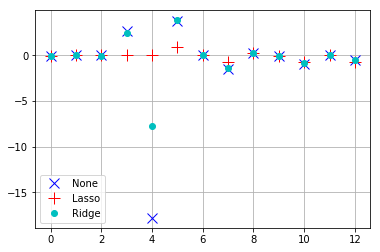

In [15]:
plt.plot(sr.coef_, 'xb', markersize=10, label='None')
plt.plot(lr.coef_, '+r', markersize=12, label='Lasso')
plt.plot(rr.coef_, '.c', markersize=12, label='Ridge')
plt.legend()
plt.grid()